<a href="https://colab.research.google.com/github/changsin/AI/blob/main/08.2.perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron


A [perceptron](https://en.wikipedia.org/wiki/Perceptron) is a two-layer neural network which outputs a value with activation by a threshold function (p. 184, Ertel 2017). It is used for classification and linear regression.


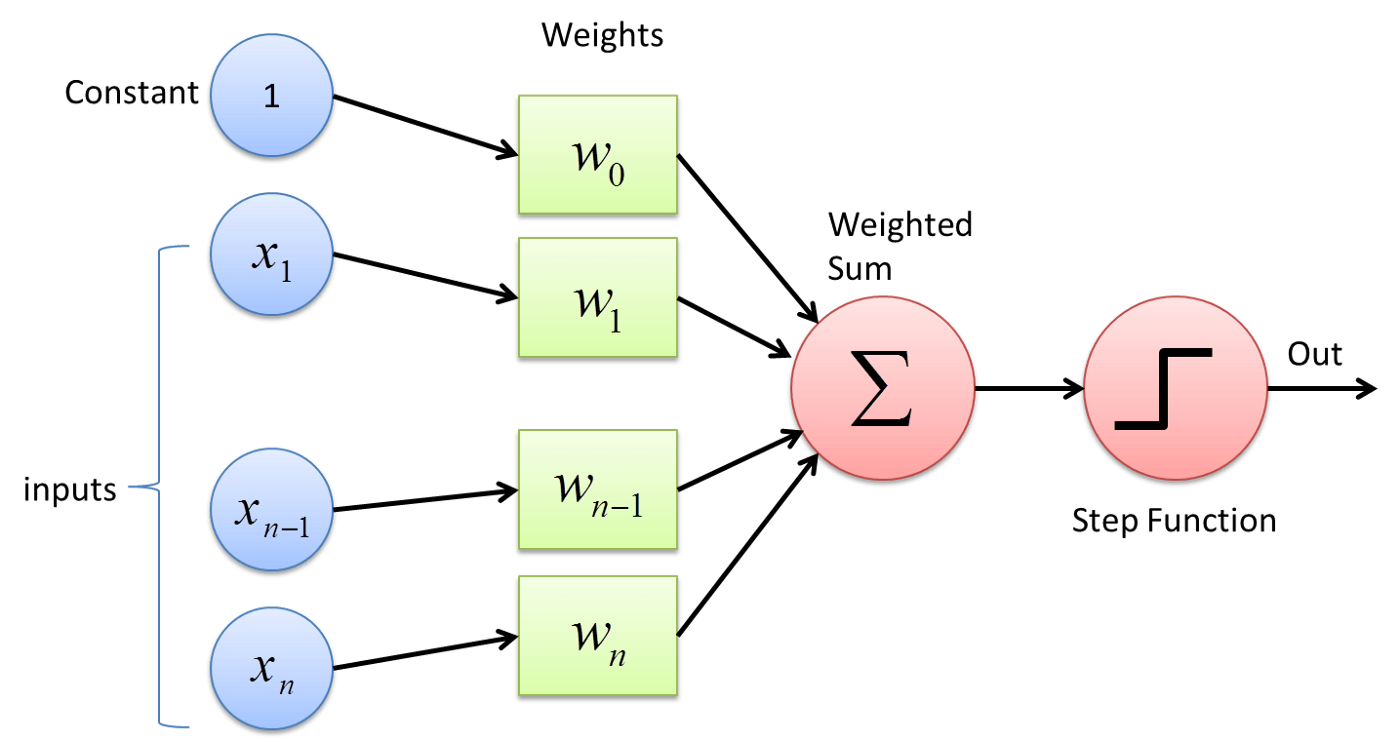




(Source: https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53)

## Create input data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
      [6., 1.],
      [7., 3.],
      [8., 2.],    
      [9., 0.],
      [8., 4.],
      [8., 6.],
      [9., 2.],    
      [9., 5.]
    ])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

### play with the data
Reshape the data to put both the input and the output in one matrix for better manipulation.

In [2]:
y_reshape = np.reshape(y, (y.shape[0], -1))
data = np.append(X, y_reshape, axis=1)
data

array([[6., 1., 0.],
       [7., 3., 0.],
       [8., 2., 0.],
       [9., 0., 0.],
       [8., 4., 1.],
       [8., 6., 1.],
       [9., 2., 1.],
       [9., 5., 1.]])

In [3]:
positives = X[y == 1]
positives

array([[8., 4.],
       [8., 6.],
       [9., 2.],
       [9., 5.]])

## Plot the data
Also do some initial plot fitting

### polyfit plotting

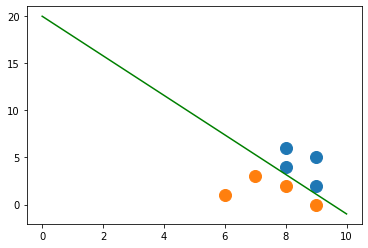

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
  positives = X[y == 1]
  negatives = X[y == 0]

  fig, ax = plt.subplots()
  ax.plot(positives[:, 0], positives[:, 1], marker='o', linestyle='', ms=12, label='+')
  ax.plot(negatives[:, 0], negatives[:, 1], marker='o', linestyle='', ms=12, label='-')
  return ax

# plt.scatter(X[:, 0], X[:, 1])

ax = plot_data(X, y)
x_line = np.linspace(0, 10, 100)
y_line = -2.1*x_line + 20

ax.plot(x_line, y_line, 'g', label='y=wx+b')


slope -1.999999999999999 intercept 18.999999999999982


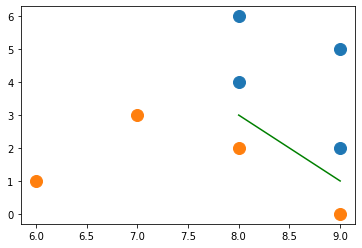

In [6]:
x1 = np.array([8., 9.])
x2 = np.array([3, 1])

ax = plot_data(X, y)
slope, intercept = np.polyfit(x1, x2, 1)
print("slope", slope, "intercept", intercept)
ax.plot(x1, x2, 'g', label='manual plotting')


## Run Logistic Regression
Let's first run the data through logistic regression which basically means to do it purely mathematically.

In [7]:
from sklearn.linear_model import LogisticRegression

model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
num_err = np.sum(y != model_logistic_regression.predict(X))
print("Number of errors:", num_err)

Number of errors: 0


## Plot the classifier
For better visualation, let's plot the data. The code is borrowed from [here](https://github.com/Bourbon0212/DataCamp-Practice/blob/master/Python/Linear%20Classifiers%20in%20Python/Linear%20Classifiers%20in%20Python.Rmd)

In [10]:
# ```{r bound_plor, engine='python', echo = F}
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
    
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out
    
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

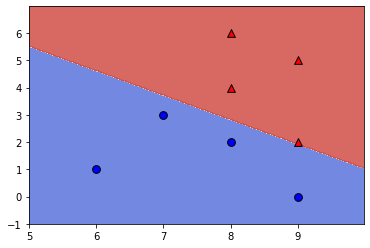

In [11]:
plot_classifier(X, y, model_logistic_regression)

# Regression through a Perceptron

This is a verbatim implementation of the algorithm from the text book Ertel (2017), "Introduction to Artificial Intelligence" (p. 185).

```
PERCEPTRONLEARNING[M+, M−]
w = arbitrary vector of real numbers
Repeat
  For all x ∈ M+
    If w x ≤ 0 Then w = w + x
  For all x ∈ M−
    If w x > 0 Then w = w − x
Until all x ∈ M+ ∪ M− are correctly classified
```




In [12]:
def perceptron(features, labels, num_iter):    
    # set weights to ones
    w = np.ones(shape=(1, features.shape[1]+1))
    
    misclassifieds = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0) - target)
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        if misclassified == 0:
          print(epoch, "All correctly classified with weights", w)
          break

        misclassifieds.append(misclassified)
    return (w, misclassifieds)

In [13]:
w, misclassifieds = perceptron(X, y, 500)


445 All correctly classified with weights [[-128.   11.   16.]]


# Exercise 8.3

Apply the perceptron learning rule to the sets
M+ = [(0, 1.8), (2, 0.6)] and M- = [(-1.2, 1.4), (0.4, -1)]
from Example 8.2 on page 186 and give the result of the values of the weight
vector.

In [14]:
w1 = np.array([1.0, 1.0])

X1 = np.array([
      [0, 1.8],
      [2, 0.6],
      [-1.2, 1.4],    
      [0.4, -1]
    ])
y1 = np.array([1, 1, 0, 0])

def perceptron_step(X, y, w, theta):
  misclassified = 0
  for id in range(len(y)):
    x = X[id]
    wx = np.dot(x, w)
    print(wx)
    if y[id] == 1 and wx <= theta:
      # print("misclassified", x, w)
      w = w + x
      print("positive correction", w)
      misclassified += 1
    elif y[id] == 0 and wx > theta:
      # print("misclassified", x, w)
      w = w - x
      print("negative correction", w)
      misclassified += 1

  if misclassified > 0:
    print("misclassified:", misclassified)
  else:
    print("DONE! Everything is classified correctly!")
    
  return w

In [15]:
w1 = perceptron_step(X1, y1, w1, 0)
w1

1.8
2.6
0.19999999999999996
negative correction [ 2.2 -0.4]
1.28
negative correction [1.8 0.6]
misclassified: 2


array([1.8, 0.6])

In [16]:
w1 = perceptron_step(X1, y1, w1, 0)
w1

1.0800000000000003
3.9600000000000004
-1.32
0.1200000000000001
negative correction [1.4 1.6]
misclassified: 1


array([1.4, 1.6])

# Exercise 8.4


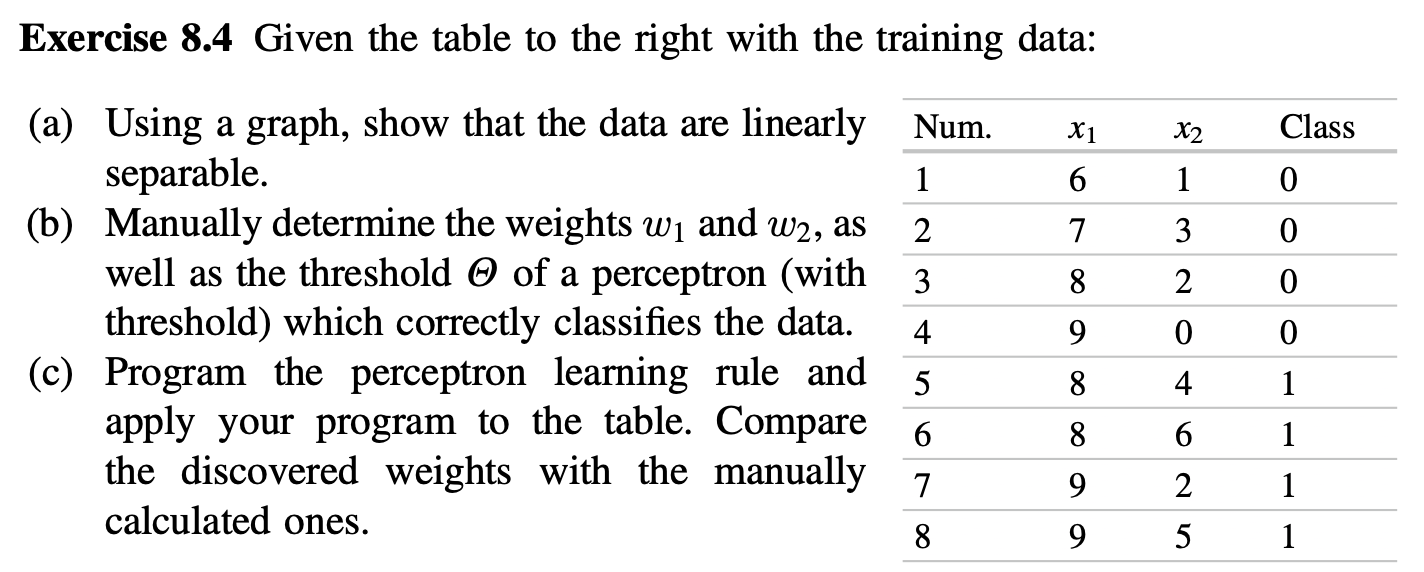

To solve the problem manually, the best way is to plot the data and try to guess the slope and the intercept (where the line meets the y axis). From the above graph, we can see that the intercept must be somewhere are 10. Why? Because we are trying to find the threshold value $\theta$ which makes the following formula true for all

$ \Sigma_{i=1}^{n} a_i x_i \gt    \theta $  for all $ x \in M_1 $ 

$ \Sigma_{i=1}^{n} a_i x_i \leq  \theta $  for all $ x \in M_2 $ 

In [17]:
W = np.ones(shape=(X.shape[1]))
W = perceptron_step(X, y, W, 10)
W

7.0
10.0
10.0
9.0
12.0
14.0
11.0
14.0
DONE! Everything is classified correctly!


array([1., 1.])